# Step-1: Import Necessary Dependencies

In [61]:
import re
import numpy as np
import pandas as pd

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
import sys
print(sys.executable)

C:\Users\muthuraj.jayaseelan\Anaconda3\python.exe


In [64]:
from wordcloud import WordCloud

In [65]:
from nltk.stem import WordNetLemmatizer

In [66]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

# Step-2: Read and Load the Dataset

In [67]:
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING="ISO-8859-1"
df = pd.read_csv(r"D:\Dataset\training.processed.noemoticon.csv",encoding=DATASET_ENCODING,names=DATASET_COLUMNS)
df.sample(5)

,target,ids,date,flag,user,text
601252,0,2221102169,Thu Jun 18 04:42:10 PDT 2009,NO_QUERY,dreiter,"the sky is green, raining hard, and lightening..."
465429,0,2175349165,Mon Jun 15 00:44:29 PDT 2009,NO_QUERY,geetarz,@citralukita it's habitual in our country that...
725915,0,2262443554,Sat Jun 20 22:31:20 PDT 2009,NO_QUERY,lovemarguerite,before work I decided to play soccer mom and r...
149048,0,1883315574,Fri May 22 08:21:20 PDT 2009,NO_QUERY,salonibal,Packing my bags.. got to leave for college tom...
372218,0,2050655290,Fri Jun 05 19:03:39 PDT 2009,NO_QUERY,WhateversLife,Everthing matching and stylish she comes home ...


# Step-3: Exploratory Data Analysis 

## 3.1: Five top records of data

In [68]:
df.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


## 3.2: Columns/features in data

In [69]:
df.columns

Index(['target', 'ids', 'date', 'flag', 'user', 'text'], dtype='object')

## 3.3: Length of the dataset

In [70]:
print('The length of the dataset is ',len(df))

The length of the dataset is  1048576


## 3.4: Shape of data

In [71]:
df.shape

(1048576, 6)

## 3.5: Data information

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1048576 non-null  int64 
 1   ids     1048576 non-null  int64 
 2   date    1048576 non-null  object
 3   flag    1048576 non-null  object
 4   user    1048576 non-null  object
 5   text    1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


## 3.6: Datatypes of all columns

In [73]:
df.dtypes

target     int64
ids        int64
date      object
flag      object
user      object
text      object
dtype: object

## 3.7: Checking for Null values

In [74]:
np.sum(df.isnull().any(axis=1))

0

## 3.8: Rows and columns in the dataset

In [75]:
print('The count of columns in the dataset : ',len(df.columns))
print('The count of rows in the dataset : ',len(df))

The count of columns in the dataset :  6
The count of rows in the dataset :  1048576


## 3.9: Check unique Target Values

In [76]:
print(df['target'].unique())

[0 4]


## 3.10: Check the number of target values

In [77]:
print(df['target'].nunique())

2


In [78]:
df.nunique()

target          2
ids       1048045
date       662454
flag            1
user       511365
text      1036136
dtype: int64

# Step-4: Data Visualization of Target Variables

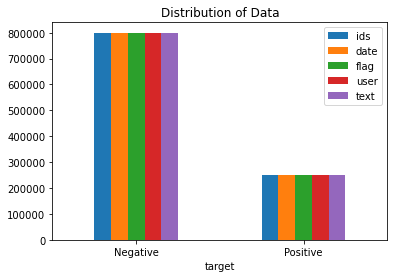

In [79]:
#Plotting the distribution of dataset.
ax = df.groupby('target').count().plot(kind='bar',title='Distribution of Data',legend=True)
ax.set_xticklabels(['Negative','Positive'],rotation=0)

#storing data in lists
text, sentiment = list(df['text']),list([df['target']])

<AxesSubplot:xlabel='target', ylabel='count'>

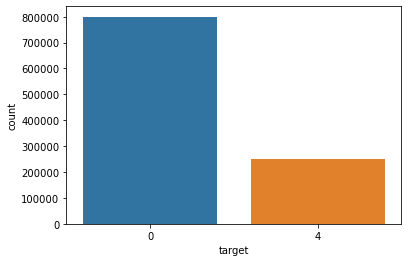

In [80]:
import seaborn as sns
sns.countplot(x='target', data=df)

In [81]:
df['target'].value_counts()[0]

800000

In [82]:
df['target'].value_counts()[4]

248576

# Step-5: Data Preprocessing

## 5.1: Selecting the text and Target column for our further analysis

In [83]:
data = df[['text','target']]

In [84]:
data

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1048571,My GrandMa is making Dinenr with my Mum,4
1048572,Mid-morning snack time... A bowl of cheese noo...,4
1048573,@ShaDeLa same here say it like from the Termi...,4
1048574,@DestinyHope92 im great thaanks wbuu?,4


## 5.2: Replacing the values to ease understanding. (Assigning 1 to Positive sentiment 4)

In [85]:
data['target'] = data['target'].replace(4,1)

C:\Users\MUTHUR~1.JAY\AppData\Local\Temp/ipykernel_1264/2499609609.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['target'] = data['target'].replace(4,1)


In [86]:
data

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
1048571,My GrandMa is making Dinenr with my Mum,1
1048572,Mid-morning snack time... A bowl of cheese noo...,1
1048573,@ShaDeLa same here say it like from the Termi...,1
1048574,@DestinyHope92 im great thaanks wbuu?,1


## 5.3: Print unique values of target variables

In [87]:
print(data['target'].unique())

[0 1]


## 5.4: Separating positive and negative tweets

In [88]:
data_pos = data[data['target']==1]

In [89]:
data_neg = data[data['target']==0]

In [90]:
data_pos

,text,target
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1
...,...,...
1048571,My GrandMa is making Dinenr with my Mum,1
1048572,Mid-morning snack time... A bowl of cheese noo...,1
1048573,@ShaDeLa same here say it like from the Termi...,1
1048574,@DestinyHope92 im great thaanks wbuu?,1


In [91]:
data_neg

,text,target
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0
...,...,...
799995,Sick Spending my day laying in bed listening ...,0
799996,Gmail is down?,0
799997,rest in peace Farrah! So sad,0
799998,@Eric_Urbane Sounds like a rival is flagging y...,0


## 5.5: taking one fourth data so we can run on our machine easily

In [92]:
data_pos = data_pos.iloc[:int(20000)]
data_neg = data_neg.iloc[:int(20000)]

## 5.6: Combining positive and negative tweets

In [93]:
dataset = pd.concat([data_pos,data_neg])

## 5.7: Making statement text in lower case

In [94]:
dataset['text'] = dataset['text'].str.lower()

## 5.8: Defining set containing all stopwords in English.

In [95]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

## 5.9: Cleaning and removing the above stop words list from the tweet text

In [96]:
STOPWORDS = set(stopwordlist)

In [97]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

800000                love @health4uandpets u guys r best!!
800001    im meeting one besties tonight! cant wait!! - ...
800002    @darealsunisakim thanks twitter add, sunisa! g...
800003    sick really cheap hurts much eat real food plu...
800004                      @lovesbrooklyn2 effect everyone
Name: text, dtype: object

In [98]:
print(str('I LOVE @Health4UandPets u guys r the best!!').split())

['I', 'LOVE', '@Health4UandPets', 'u', 'guys', 'r', 'the', 'best!!']


## 5.10: Cleaning and removing punctuations

In [99]:
import string
punctuations_list = string.punctuation
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

19995    not much time off weekend work trip malmï¿½ fr...
19996                                     one day holidays
19997                     feeling right  hate damn humprey
19998    geezi hv read whole book personality types emb...
19999    threw sign donnie bent over get but thingee ma...
Name: text, dtype: object

## 5.11: Cleaning and removing repeating characters

In [100]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+',r'\1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

19995    not much time of wekend work trip malmï¿½ fris...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999    threw sign donie bent over get but thinge made...
Name: text, dtype: object

## 5.12: Cleaning and removing URL’s

In [101]:
def cleaning_URLs(data):
    return re.sub('([\w+]+\:\/\/)?([\w\d-]+\.)*[\w-]+[\.\:]\w+([\/\?\=\&\#.a\]?[\w-]+)*\/?',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

19995    not much time of wekend work trip malmï¿½ fris...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999    threw sign donie bent over get but thinge made...
Name: text, dtype: object

## 5.13: Cleaning and removing Numeric numbers

In [102]:
def cleaning_numbers(data):
    return re.sub('[0-9]+','',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

19995    not much time of wekend work trip malmï¿½ fris...
19996                                     one day holidays
19997                       feling right hate damn humprey
19998    gezi hv read whole bok personality types embar...
19999    threw sign donie bent over get but thinge made...
Name: text, dtype: object

## 5.14: Getting tokenization of tweet text

In [103]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].tail()

19995    [not, much, time, of, wekend, work, trip, malm...
19996                                 [one, day, holidays]
19997                 [feling, right, hate, damn, humprey]
19998    [gezi, hv, read, whole, bok, personality, type...
19999    [threw, sign, donie, bent, over, get, but, thi...
Name: text, dtype: object

In [104]:
dataset['text'].head()

800000             [love, healthuandpets, u, guys, r, best]
800001    [im, meting, one, besties, tonight, cant, wait...
800002    [darealsunisakim, thanks, twiter, ad, sunisa, ...
800003    [sick, realy, cheap, hurts, much, eat, real, f...
800004                      [lovesbroklyn, efect, everyone]
Name: text, dtype: object

## 5.15: Applying Stemming

In [105]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return text

In [106]:
dataset['text']=dataset['text'].apply(lambda x:stemming_on_text(x) )
dataset['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, mete, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twiter, ad, sunisa, g...
800003    [sick, reali, cheap, hurt, much, eat, real, fo...
800004                       [lovesbroklyn, efect, everyon]
Name: text, dtype: object

## 5.16: Applying Lemmatizer

In [107]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return text

In [108]:
dataset['text']=dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].tail()

19995    [not, much, time, of, wekend, work, trip, malm...
19996                                  [one, day, holiday]
19997                   [fele, right, hate, damn, humprey]
19998    [gezi, hv, read, whole, bok, person, type, emb...
19999    [threw, sign, doni, bent, over, get, but, thin...
Name: text, dtype: object

In [109]:
dataset['text'].head()

800000               [love, healthuandpet, u, guy, r, best]
800001    [im, mete, one, besti, tonight, cant, wait, gi...
800002    [darealsunisakim, thank, twiter, ad, sunisa, g...
800003    [sick, reali, cheap, hurt, much, eat, real, fo...
800004                       [lovesbroklyn, efect, everyon]
Name: text, dtype: object

## 5.17: Separating input feature and label

In [110]:
x = data.text
y = data.target

## 5.18: Plot a cloud of words for negative tweets

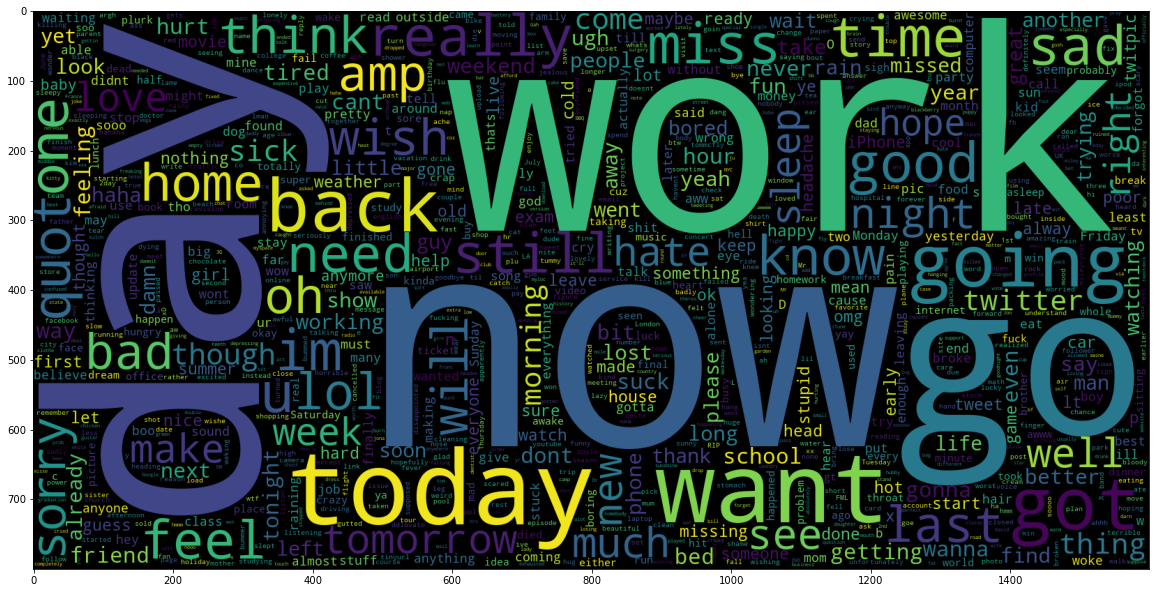

In [111]:
data_neg = data['text'][:800000]
plt.figure(figsize=(20,20))
wc = WordCloud(width=1600,height=800,max_words=1000,collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

## 5.19: Plot a cloud of words for positive tweets

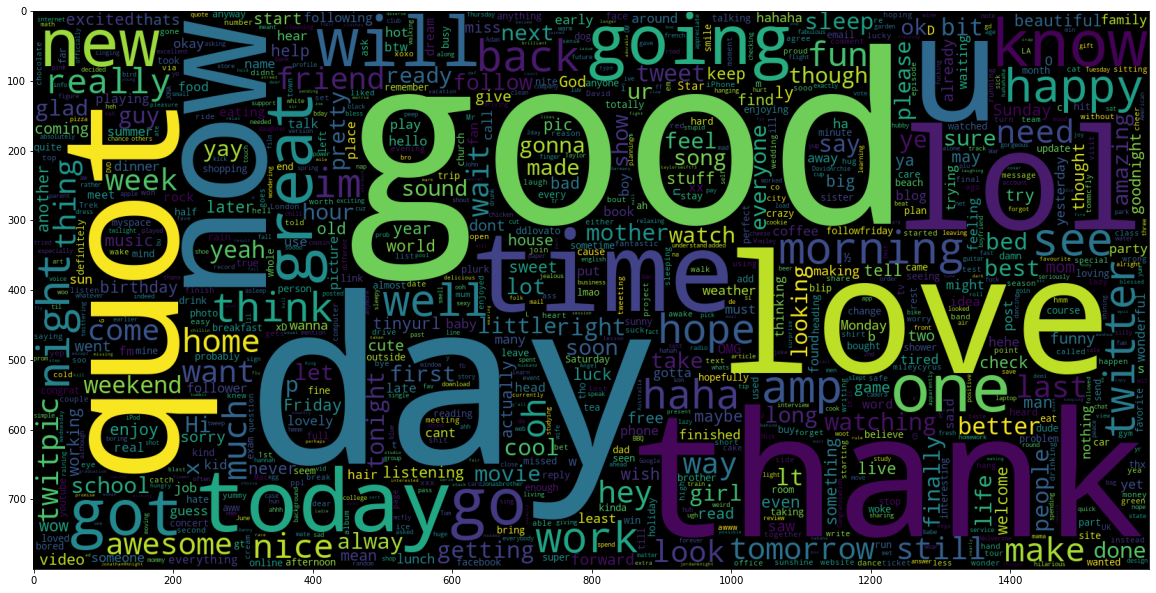

In [112]:
data_pos = data['text'][800000:]
wc2 = WordCloud(max_words = 1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc2)

# Step-6: Splitting our data into Train and Test Subset

In [113]:
# Separating the 95% data for training data and 5% for testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.05,random_state=0)

# Step-7: Transforming Dataset using TF-IDF Vectorizer

## 7.1: Fit the TF-IDF Vectorizer

In [114]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  500000


## 7.2: Transform the data using TF-IDF Vectorizer

In [115]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

# Step-8: Function For Model Evaluation

In [116]:
def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(x_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

# Step-9: Model Building

## 8.1: Model-1

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     39883
           1       0.68      0.65      0.67     12546

    accuracy                           0.84     52429
   macro avg       0.79      0.78      0.78     52429
weighted avg       0.84      0.84      0.84     52429



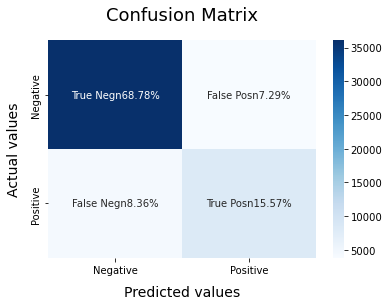

In [117]:
BNBModel = BernoulliNB()
BNBModel.fit(x_train,y_train)
model_Evaluate(BNBModel)
y_pred1 = BNBModel.predict(x_test)

## 8.3: Model-2:

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     39883
           1       0.74      0.64      0.68     12546

    accuracy                           0.86     52429
   macro avg       0.81      0.78      0.80     52429
weighted avg       0.85      0.86      0.86     52429



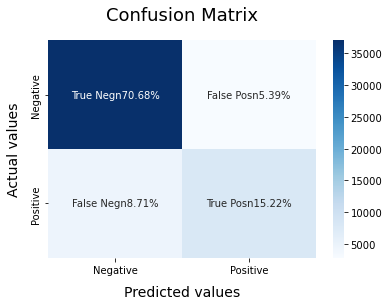

In [122]:
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(x_test)

## Model-3:

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     39883
           1       0.79      0.61      0.69     12546

    accuracy                           0.87     52429
   macro avg       0.84      0.78      0.80     52429
weighted avg       0.86      0.87      0.86     52429



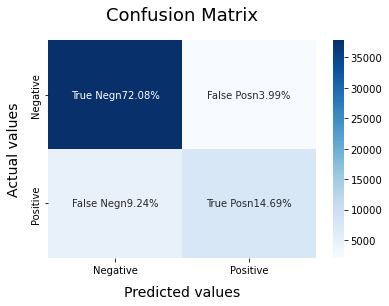

In [124]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(x_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(x_test)
